Question 2. For the beam shown in figure 2, determine the following. Obtain results at E =
210 GPa, I = 5 x 10-6 m-4, w = 7 kN/m, L1=3m, L2=4m, L3=2m.
1. Global stiffness matrix for the structure.
2. Rotations at nodes 1, 2 and 3.
3. Reactions at nodes 1, 2, 3 and 4.
4. Shear force and bending moment in each element.
5. SFD for each element.
6. BMD for each element.

In [11]:
import numpy as np
import matplotlib.pyplot as plt 

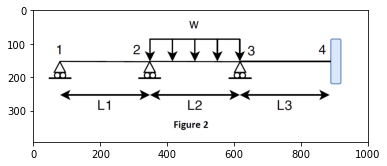

In [12]:
import matplotlib.image as mpimg
img=mpimg.imread('Q2.png')
imgplot = plt.imshow(img)

In [13]:

E=float(input("Young's Modulus in KN/M^2" ))
I=float(input("Moment Of Inertia of Section in M^4" ))
L1=float(input("Length of Element 1 in M" ))
L2=float(input("Length of Element 2 in M" ))
L3=float(input("Length of Element 2 in M" ))
w=float(input("Enter value of UDL in KN/m "))

def BeamElementStiffness(E,I,L):
    k = E*I/(L**3)*np.array([[12,6*L,-12,6*L],[6*L,4*L*L,-6*L,2*L*L],[-12,-6*L,12,-6*L],[6*L,2*L*L,-6*L,4*L*L]])
    return k

k1=BeamElementStiffness(E,I,L1)
k2=BeamElementStiffness(E,I,L2)
k3=BeamElementStiffness(E,I,L3)

K = np.zeros((8,8))

def BeamAssemble(K,k,i,j):
    K[2*i-2][2*i-2]+=k[0][0]
    K[2*i-2][2*i-1]+=k[0][1]
    K[2*i-2][2*j-2]+=k[0][2]
    K[2*i-2][2*j-1]+=k[0][3]
    K[2*i-1][2*i-2]+=k[1][0]
    K[2*i-1][2*i-1]+=k[1][1]
    K[2*i-1][2*j-2]+=k[1][2]
    K[2*i-1][2*j-1]+=k[1][3]
    K[2*j-2][2*i-2]+=k[2][0]
    K[2*j-2][2*i-1]+=k[2][1]
    K[2*j-2][2*j-2]+=k[2][2]
    K[2*j-2][2*j-1]+=k[2][3]
    K[2*j-1][2*i-2]+=k[3][0]
    K[2*j-1][2*i-1]+=k[3][1]
    K[2*j-1][2*j-2]+=k[3][2]
    K[2*j-1][2*j-1]+=k[3][3]

    return K

K= BeamAssemble(K,k1,1,2)
K= BeamAssemble(K,k2,2,3)
K= BeamAssemble(K,k3,3,4)
print(f"Global Stifness Matrix = \n {K}")

Global Stifness Matrix = 
 [[  466.66666667   700.          -466.66666667   700.
      0.             0.             0.             0.        ]
 [  700.          1400.          -700.           700.
      0.             0.             0.             0.        ]
 [ -466.66666667  -700.           663.54166667  -306.25
   -196.875        393.75           0.             0.        ]
 [  700.           700.          -306.25        2450.
   -393.75         525.             0.             0.        ]
 [    0.             0.          -196.875       -393.75
   1771.875       1181.25       -1575.          1575.        ]
 [    0.             0.           393.75         525.
   1181.25        3150.         -1575.          1050.        ]
 [    0.             0.             0.             0.
  -1575.         -1575.          1575.         -1575.        ]
 [    0.             0.             0.             0.
   1575.          1050.         -1575.          2100.        ]]


In [14]:
b= np.delete(K,0,0)
b= np.delete(b,0,1)
b= np.delete(b,1,0)
b= np.delete(b,1,1)
b= np.delete(b,2,0)
b= np.delete(b,2,1)
b= np.delete(b,3,0)
b= np.delete(b,3,1)
b= np.delete(b,3,0)
b= np.delete(b,3,1)
force=np.array([[0],[0],[0],[-w*L2*L2/12],[0],[w*L2*L2/12],[0],[0]])
f=np.delete(force,0,0)
f=np.delete(f,1,0)
f=np.delete(f,2,0)
f=np.delete(f,3,0)
f=np.delete(f,3,0)
u=np.linalg.inv(b).dot(f)
print(f"Rotation at node 1 : {u[0]} rad")
print(f"Rotation at node 2 : {u[1]} rad")
print(f"Rotation at node 3 : {u[2]} rad")
print("Note: Negative sign for clockwise rotation ")

Rotation at node 1 : [0.00270531] rad
Rotation at node 2 : [-0.00541063] rad
Rotation at node 3 : [0.00386473] rad
Note: Negative sign for clockwise rotation 


In [15]:
U=np.zeros((8,1))
U[1],U[3],U[5]=u[0],u[1],u[2]
F=K.dot(U)
print(f"Reaction at node 1 : {F[0]}")
print(f"Reaction at node 2 : {F[2]}")
print(f"Reaction at node 3 : {F[4]}")
print(f"Reaction at node 4 : {F[6]}")
print("Note: Negative sign for downward reaction ")

Reaction at node 1 : [-1.89371981]
Reaction at node 2 : [1.28502415]
Reaction at node 3 : [6.69565217]
Reaction at node 4 : [-6.08695652]
Note: Negative sign for downward reaction 


In [16]:
u1=np.array([U[0],U[1],U[2],U[3]])
u2=np.array([U[2],U[3],U[4],U[5]])
u3=np.array([U[4],U[5],U[6],U[7]])
def BeamElementForces(k,u):
    return k.dot(u)
f1=BeamElementForces(k1,u1)
f3=BeamElementForces(k3,u3)
f2=BeamElementForces(k2,u2)
#Correction for the f2 i.e. forces in element 2
f2_correct =f2-[[-14],[-9.333],[-14],[9.333]]


Shear Force Diagram for element 1 :


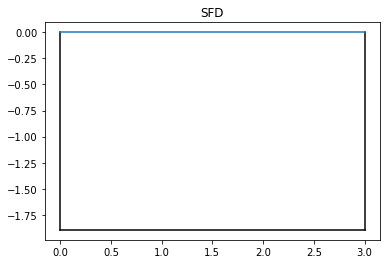

Shear Force Diagram for element 2 :


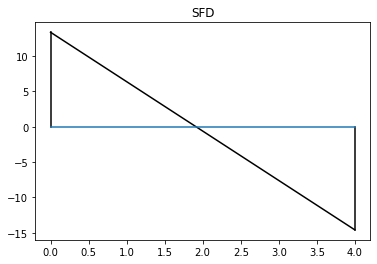

Shear Force Diagram for element 3 :


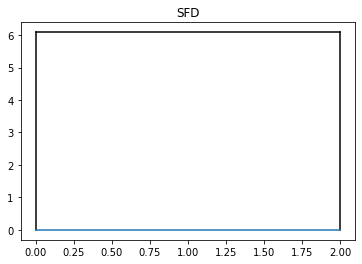

In [20]:
def BeamElementShearForceDiagram(f,L):
    x1,x2=0,L
    y1,y2=f[0],-f[2]
    plt.plot([x1,x2],[y1,y2],'black')
    plt.plot([x1,x1],[x1,y1],'black')
    plt.plot([x2,x2],[x1,y2],'black')
    plt.plot([x1,x2],[x1,x1])
    plt.title('SFD')
    plt.show()
print(f'Shear Force Diagram for element 1 :')
BeamElementShearForceDiagram(f1,L1)
print(f'Shear Force Diagram for element 2 :')
BeamElementShearForceDiagram(f2_correct,L2)
print(f'Shear Force Diagram for element 3 :')
BeamElementShearForceDiagram(f3,L3)

BMD for element 1


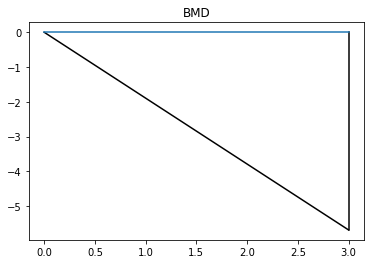

BMD for element 2


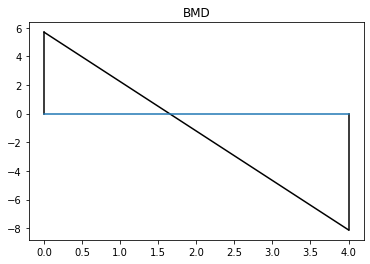

BMD for element 3


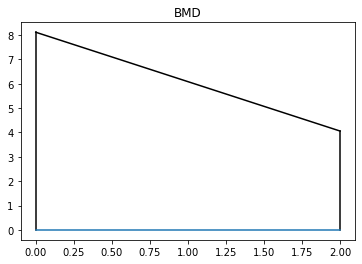

In [18]:
def BeamElementBMD(f,L):
    x1,x2=0,L
    y1,y2=f[1],f[3]
    plt.plot([x1,x2],[y1,y2],'black')
    plt.plot([x1,x1],[x1,y1],'black')
    plt.plot([x2,x2],[x1,y2],'black')
    plt.plot([x1,x2],[x1,x1])
    plt.title('BMD')
    plt.show()
print("BMD for element 1")
BeamElementBMD(f1,L1)
print("BMD for element 2")
BeamElementBMD(f2_correct,L2)
print("BMD for element 3")
BeamElementBMD(f3,L3)

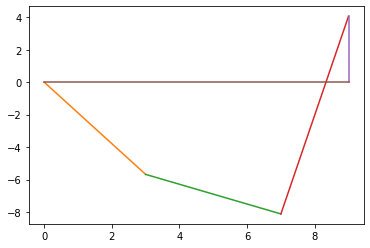

In [19]:
def BMD(f_1,f_2,f_3,L_1,L_2,L_3):
    x1,x2,x3,x4=0,L_1,L_1+L_2,L_1+L_2+L_3
    y1,y2,y3,y4=f_1[1],f_1[3],f_2[3],f_3[3]
    plt.plot([x1,x1],[x1,y1])
    plt.plot([x1,x2],[y1,y2])
    plt.plot([x2,x3],[y2,y3])
    plt.plot([x3,x4],[y3,y4])
    plt.plot([x4,x4],[y4,0])
    plt.plot([x1,x4],[0,0])
    
BMD(f1,f2_correct,f3,L1,L2,L3)